In [105]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from gensim.models import Word2Vec
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize


In [106]:
# Load the data
df = pd.read_csv('/Users/elvisechefu/Desktop/Classic model/languages.csv')

In [107]:
# Initialize Word2Vec model for word embeddings
word2vec_model = Word2Vec(sentences=[word_tokenize(text) for text in df['text']], vector_size=100, window=5, min_count=1, workers=4)

# Function to average word vectors for a text
def average_word_vectors(text):
    word_vectors = [word2vec_model.wv[word] for word in word_tokenize(text) if word in word2vec_model.wv]
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(100)  # Return zero vector if no word vectors found


In [108]:
# Split the data into features and target labels
X = df['text']
y = df['language']

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) 


In [109]:
# Define the text preprocessing and feature extraction pipeline
word2vec_pipeline = Pipeline([
    ('word_vectors', FunctionTransformer(lambda x: np.array([average_word_vectors(sentence) for sentence in x]))),
])

In [110]:
# Transform the training, validation, and test sets
X_train_word2vec = word2vec_pipeline.fit_transform(X_train)


In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train the decision tree classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train_word2vec, y_train)

DecisionTreeClassifier()

In [112]:
# Make predictions on the training data
y_train_pred = decision_tree_classifier.predict(X_train_word2vec)

# Calculate evaluation metrics
accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred, average='weighted')
recall = recall_score(y_train, y_train_pred, average='weighted')
f1 = f1_score(y_train, y_train_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9999956351891054
Precision: 0.9999956352419439
Recall: 0.9999956351891054
F1-score: 0.9999956351893079


In [113]:
# Make predictions on the validation data
X_val_word2vec = word2vec_pipeline.transform(X_val)
y_val_pred = decision_tree_classifier.predict(X_val_word2vec)

# Calculate evaluation metrics
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred, average='weighted')
val_recall = recall_score(y_val, y_val_pred, average='weighted')
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

print("Validation Accuracy:", val_accuracy)
print("Validation Precision:", val_precision)
print("Validation Recall:", val_recall)
print("Validation F1-score:", val_f1)


Validation Accuracy: 0.9936884972207127
Validation Precision: 0.9936898550949209
Validation Recall: 0.9936884972207127
Validation F1-score: 0.9936891312295035


In [114]:
# Make predictions on the test data
X_test_word2vec = word2vec_pipeline.transform(X_test)
y_test_pred = decision_tree_classifier.predict(X_test_word2vec)

# Calculate evaluation metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-score:", test_f1)


Test Accuracy: 0.9933153067036802
Test Precision: 0.9933162419696803
Test Recall: 0.9933153067036802
Test F1-score: 0.9933157476840538


In [126]:
def train_with_varying_sizes(X_train, y_train, X_val, y_val, X_test, y_test, sizes):
    train_accuracies, val_accuracies, test_accuracies = [], [], []
    train_precisions, val_precisions, test_precisions = [], [], []
    train_recalls, val_recalls, test_recalls = [], [], []
    train_f1s, val_f1s, test_f1s = [], [], []

    for size in sizes:
        X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
        # Fit the word2vec model on the training subset
        word2vec_pipeline.fit(X_train_subset)
        
        # Extract features from the training subset
        X_train_subset_features = word2vec_pipeline.transform(X_train_subset)
        X_val_features = word2vec_pipeline.transform(X_val)
        X_test_features = word2vec_pipeline.transform(X_test)
        
        # Train the decision tree classifier
        decision_tree_classifier.fit(X_train_subset_features, y_train_subset)

        # Predict labels for the training subset
        y_train_pred = decision_tree_classifier.predict(X_train_subset_features)
        # Predict labels for the validation set
        y_val_pred = decision_tree_classifier.predict(X_val_features)
        # Predict labels for the test set
        y_test_pred = decision_tree_classifier.predict(X_test_features)
        
        # Calculate metrics for the training subset
        train_accuracy, train_precision, train_recall, train_f1 = calculate_metrics(y_train_subset, y_train_pred)
        # Calculate metrics for the validation set
        val_accuracy, val_precision, val_recall, val_f1 = calculate_metrics(y_val, y_val_pred)
        # Calculate metrics for the test set
        test_accuracy, test_precision, test_recall, test_f1 = calculate_metrics(y_test, y_test_pred)
        
        # Append the metrics to the corresponding lists
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        test_accuracies.append(test_accuracy)

        train_precisions.append(train_precision)
        val_precisions.append(val_precision)
        test_precisions.append(test_precision)

        train_recalls.append(train_recall)
        val_recalls.append(val_recall)
        test_recalls.append(test_recall)

        train_f1s.append(train_f1)
        val_f1s.append(val_f1)
        test_f1s.append(test_f1)
        
    return (train_accuracies, val_accuracies, test_accuracies), \
           (train_precisions, val_precisions, test_precisions), \
           (train_recalls, val_recalls, test_recalls), \
           (train_f1s, val_f1s, test_f1s)

# Call the train_with_varying_sizes function
accuracy_scores, precision_scores, recall_scores, f1_scores = train_with_varying_sizes(X_train, y_train, X_val, y_val, X_test, y_test, train_sizes)


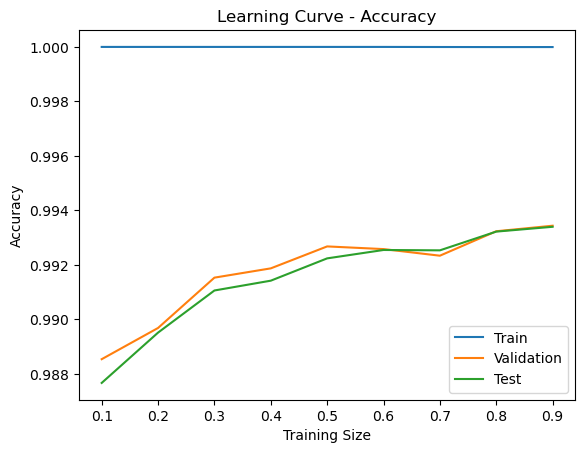

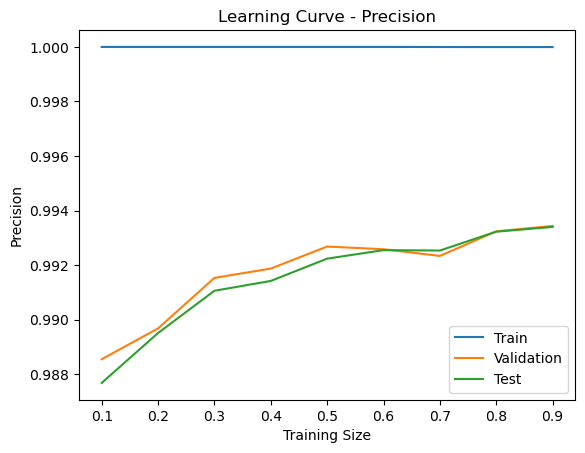

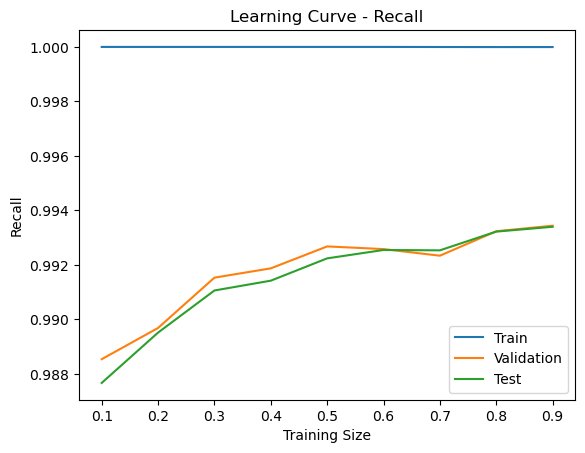

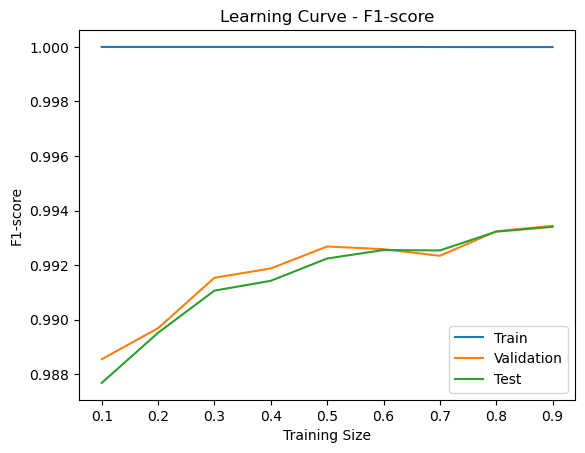

In [127]:
# Plot learning curves for each metric
plot_learning_curves(train_sizes, accuracy_scores[0], accuracy_scores[1], accuracy_scores[2], 'Accuracy')
plot_learning_curves(train_sizes, precision_scores[0], precision_scores[1], precision_scores[2], 'Precision')
plot_learning_curves(train_sizes, recall_scores[0], recall_scores[1], recall_scores[2], 'Recall')
plot_learning_curves(train_sizes, f1_scores[0], f1_scores[1], f1_scores[2], 'F1-score')